# Marketing Mix Modeling in Python

![banner](https://raw.githubusercontent.com/MayumyCH/marketing_mix_modeling_project_python/main/resources/banner.jpeg)

_Este proyecto propone el análisis de la data proporcionada por Kaggle para el área de Marketing; se busca encontrar **"Qué inversión publicitaria impulsa** realmente **las ventas"**._

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

import plotly.express as px

## 1. FUNCIONES


In [9]:
def analizador_nulos(data):
    nFilas, nColumnas = data.shape
    if data.isnull().any().any(): # Devuelve True si alguno es True
        print( "\n TABLA DE DATOS NULOS")
        tablaNulos = pd.DataFrame(pd.concat([
                                             data.isnull().any(), 
                                             data.isnull().sum(), 
                                            round(data.isnull().sum() / nFilas * 100, 2), 
                                             data.dtypes], axis=1))
        tablaNulos.columns = ['Nulos', 'Cantidad', '%_Nulos', 'Tipo_Dato']
        tablaNulos.sort_values(by='%_Nulos', ascending = False, inplace = True)
        display(tablaNulos[tablaNulos['Cantidad'] > 0])
    else:
        print("No existen Nulos")

## 2. Comprensión de los datos


Este [dataset](https://www.kaggle.com/harrimansaragih/dummy-advertising-and-sales-data) se encuentra en Kaggle. Este contiene 5 variables los cuales se detalla a continuación:


| VARIABLE | DESCRIPCIÓN                |
| :-------- | :------------------------- |
| TV |  Presupuesto de promoción televisiva (en millones) |
| Social Media |  Presupuesto de promoción de redes sociales (en millones)|
| Radio |  Presupuesto de promoción radiofónica (en millones) |
| Influencer |  si la promoción colabora con Mega, Macro, Nano, Micro influencer |
| Sales |  Ventas (en millones) |

In [10]:
# IMPORTAR los datos desde Jupyter
# url_data = "dataset/data_marketing.csv"

# Importar los datos desde un link
url_data = "https://raw.githubusercontent.com/MayumyCH/marketing_mix_modeling_project_python/main/dataset/data_marketing.csv"

data_Marketing = pd.read_csv(url_data)
# data_Marketing.tail()
data_Marketing.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [11]:
data_Marketing.shape

# INTERPRETACION:
# 4572 observaciones
# 5 features/variables

(4572, 5)

In [12]:
# CANTIDAD DE NULOS POR CADA FEATURE
analizador_nulos(data_Marketing)

# INTERPRETACION:
# Variable Tv: 10 Valores nulos
# Variable Radio: 6 Valores nulos
# Variable Social: 6 Valores nulos
# Variable Sales(Ventas): 6 Valores nulos


 TABLA DE DATOS NULOS


,Nulos,Cantidad,%_Nulos,Tipo_Dato
TV,True,10,0.22,float64
Social Media,True,6,0.13,float64
Sales,True,6,0.13,float64
Radio,True,4,0.09,float64


In [13]:
# Libreria para ver los nulos
# import missingno as msno
# msno.matrix(data_Marketing)

## Analisis exploratorios ( EDA)

In [14]:
data_Marketing.info()

# INTERPRETACION:
# 4 Features tipo Numericos (float)
# 1 Features tipo Categorico (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [15]:
# DESCRIPCION DE LOS DATOS NUMERICOS
data_Marketing.describe().T 
# Nota en este caso solo se veran los describes de las variables numericas!

,count,mean,std,min,25%,50%,75%,max
TV,4562.0,54.066857,26.125054,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4568.0,18.160356,9.676958,0.000684,10.525957,17.859513,25.649730,48.871161
Social Media,4566.0,3.323956,2.212670,0.000031,1.527849,3.055565,4.807558,13.981662
Sales,4566.0,192.466602,93.133092,31.199409,112.322882,189.231172,272.507922,364.079751


In [16]:
# DESCRIPCION DE LOS DATOS CATEGORICOS
data_Marketing.describe(include = 'object')
# data_Marketing.describe(include="all")

,Influencer
count,4572
unique,4
top,Mega
freq,1158


In [17]:
data_Marketing.corr()
# OBSERVACION
# Sales con TV tienen una alta correlación 0.99
# Sales con Radio tienen una correlación de 0.86
# Sales con Social Media tienen una correlación 0.53

#NOTA: Cuando 2 variables tiene una correlacion > 0.6 ya es significativa (Mas cercano a 1 o -1)
# Observacion se ve que la Tv con la Radio estan relacionados tambien !

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


<AxesSubplot:>

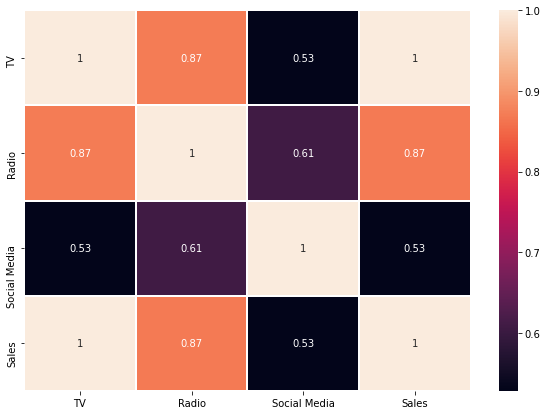

In [18]:
# CORRELACION DE MIS VARIABLES
plt.figure(figsize=(10,7))
sns.heatmap(data_Marketing.corr(),annot=True, linewidths=2)

In [19]:
data_Marketing.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [41]:
px.imshow(data_Marketing.corr(),
          color_continuous_scale='RdBu_r',
          labels=dict(x="x", y="y", color="Nro Correlación")
          )

In [75]:
import plotly.express as px
df = px.data.tips()
# fig = px.histogram(data_Marketing, x="Sales", histnorm='probability density')
fig = px.histogram(data_Marketing, x="Sales", nbins=20)
fig.show()

In [ ]:
df = px.data.tips()
# fig = px.histogram(data_Marketing, x="Sales", histnorm='probability density')
fig = px.histogram(data_Marketing, x="Sales", nbins=20)
fig.show()

In [76]:
import plotly.express as px
 
fig = px.box(data_Marketing, x = "Sales",points="outliers",notched=True)
# fig.update_traces(quartilemethod="inclusive")
 
fig.show()

In [77]:
fig = px.scatter(
    data_Marketing, x='TV', y='Sales', opacity=0.65, trendline='ols', trendline_color_override='darkblue',
    marginal_x="histogram", marginal_y="histogram",
    title='Grafico de TV vs Sales')
fig.show()

## Preprocesamiento de los datos

In [23]:
## En este caso como hay valores nulos:
# Se pueden eliminar: Eso se podria debido a que % de valores nulos es muy baja
# Reemplazar con valores:
data_Marketing['TV'].fillna(data_Marketing['TV'].median(), inplace=True)
data_Marketing['Radio'].fillna(data_Marketing['Radio'].median(), inplace=True)
data_Marketing['Social Media'].fillna(data_Marketing['Social Media'].median(), inplace=True)
data_Marketing['Sales'].fillna(data_Marketing['Sales'].median(), inplace=True)

## Modelo: Regresión Lineal Multiple
Representante más simple de los modelos aditivos!

Nuestra regresión multiple se veria de la sgte forma:

> $Y_{Sales} = Base + a(X_{Tv}) + b( X_{Radio}) + c( X_{Banner}$)


In [24]:
target = 'Sales'
predictoras = ['TV','Radio','Social Media']

In [25]:
X = data_Marketing[predictoras]
y = data_Marketing[target]

In [26]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split, cross_val_score
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'
# Entrenamiento del modelo
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
print("La intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

La intersección del modelo lineal: 0.3902946338252775
Los coeficientes del modelo lineal: [3.50398802 0.14088139 0.02341146]


El modelo quedara del sgte modo:
> $Y_{Sales} = 0.39 + 3.5(X_{Tv}) + 0.14( X_{Radio}) + 0.02( X_{Banner}$)

**Interpretación:**

*   Si no invertimos en publicidad en radio podremos decir que: Por cada aumento en una unidad de **la inversion en publicidad en la Tv**, el **total de ventas del producto** aumentará en **0.06 mil de soles**.
*   Si no invertimos en publicidad en tv podremos decir que: Por cada aumento en una unidad de **la inversion en publicidad en la radio**, el **total de ventas del producto** aumentará en **0.10 mil de soles**.
*   Cuando las variables predictoras sean 0, el **total de ventas del producto** es de 4.48 mil de soles


In [28]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [29]:
# Visualizaremos el ENTRENAMIENTO y la PREDICCION
# -----------------------------------------------
df_train= pd.concat([X_train, y_train], axis = 1).head() # DATA REAL DE ENTRENAMIENTO
df_train['Sales Predict'] = train_pred[:5] # LA PREDICIÓN DE ENTRENAMIENTO
df_train

,TV,Radio,Social Media,Sales,Sales Predict
2546,20.0,3.315551,0.424423,71.754233,70.947091
732,25.0,0.981140,1.377660,92.302431,88.160473
3559,86.0,18.907308,4.165040,305.204371,304.494462
1729,52.0,19.521404,5.296023,188.037471,185.471862
618,78.0,18.159047,4.246496,274.093997,276.359049


El modelo quedara del sgte modo:
-- 2546--
> $Y_{Sales} = 0.39 + 3.5(20.0) + 0.14( 3.32) + 0.02( 0.42)$

In [30]:
# Ejemplo manual # 2546
y_2546 = 0.3902946338252775 + 3.50398802*(20.0) + 0.14088139*(3.315551) + 0.02341146*(0.424423)
y_2546

70.94709082940875

In [31]:
71.754233 - 70.94709082940875

0.8071421705912485

In [32]:
71.754233 / 70.94709082940875

1.0113766774811388

Como se observa de lo predecido al valor real existe una diferencia de 0.807

In [33]:
3.50398802*(20.0)
# Contribucion no ajustada de la television

70.0797604

> $coef_{Tv} * (X_{Tv}) = 3.50398802(20) =70.0797604$

In [34]:
# multipliquemos las contribuciones y la línea de base 
# por un factor de corrección correct_factor = 15904.11 / 16147.0159 ≈ 0.985 y todo está bien. Obtenemos

> $correctFactor = \frac{Y_{sales}}{Y_{salesPredict}} = \frac{71.754233}{70.94709082940875}  \approx 1.011$

Entonces la contribucion de la Tv es:
    
> $Contribucion_{Tv} = correctFactor * (70.0797604) = 1.011* (70.0797604) =70.85063776439999$

In [35]:
1.011* (70.0797604)

70.85063776439999